# 신경망 딥러닝

딥러닝은 머신러닝의 한 방법이며, 신경망 모델이라고 불리는 뇌의 신경 네트워크에서 힌트를 얻은 알고리즘이다.

큰 범주로는 머신러닝이며 그 안에 신경망 모델이 속하며 또 그안에 딥러닝이 속한다.

딥러닝은 심층 신경망(DNN; deep neural network)라고도 한다.

## 7.1 뉴런 모델

신경망 모델은 '뉴런 모델' 단위로 구축된다.

뉴런 모델은 뇌의 신경 세포에서 힌트를 얻어 만들어진 수학적 모델이다.



- 7.1.1 신경 세포

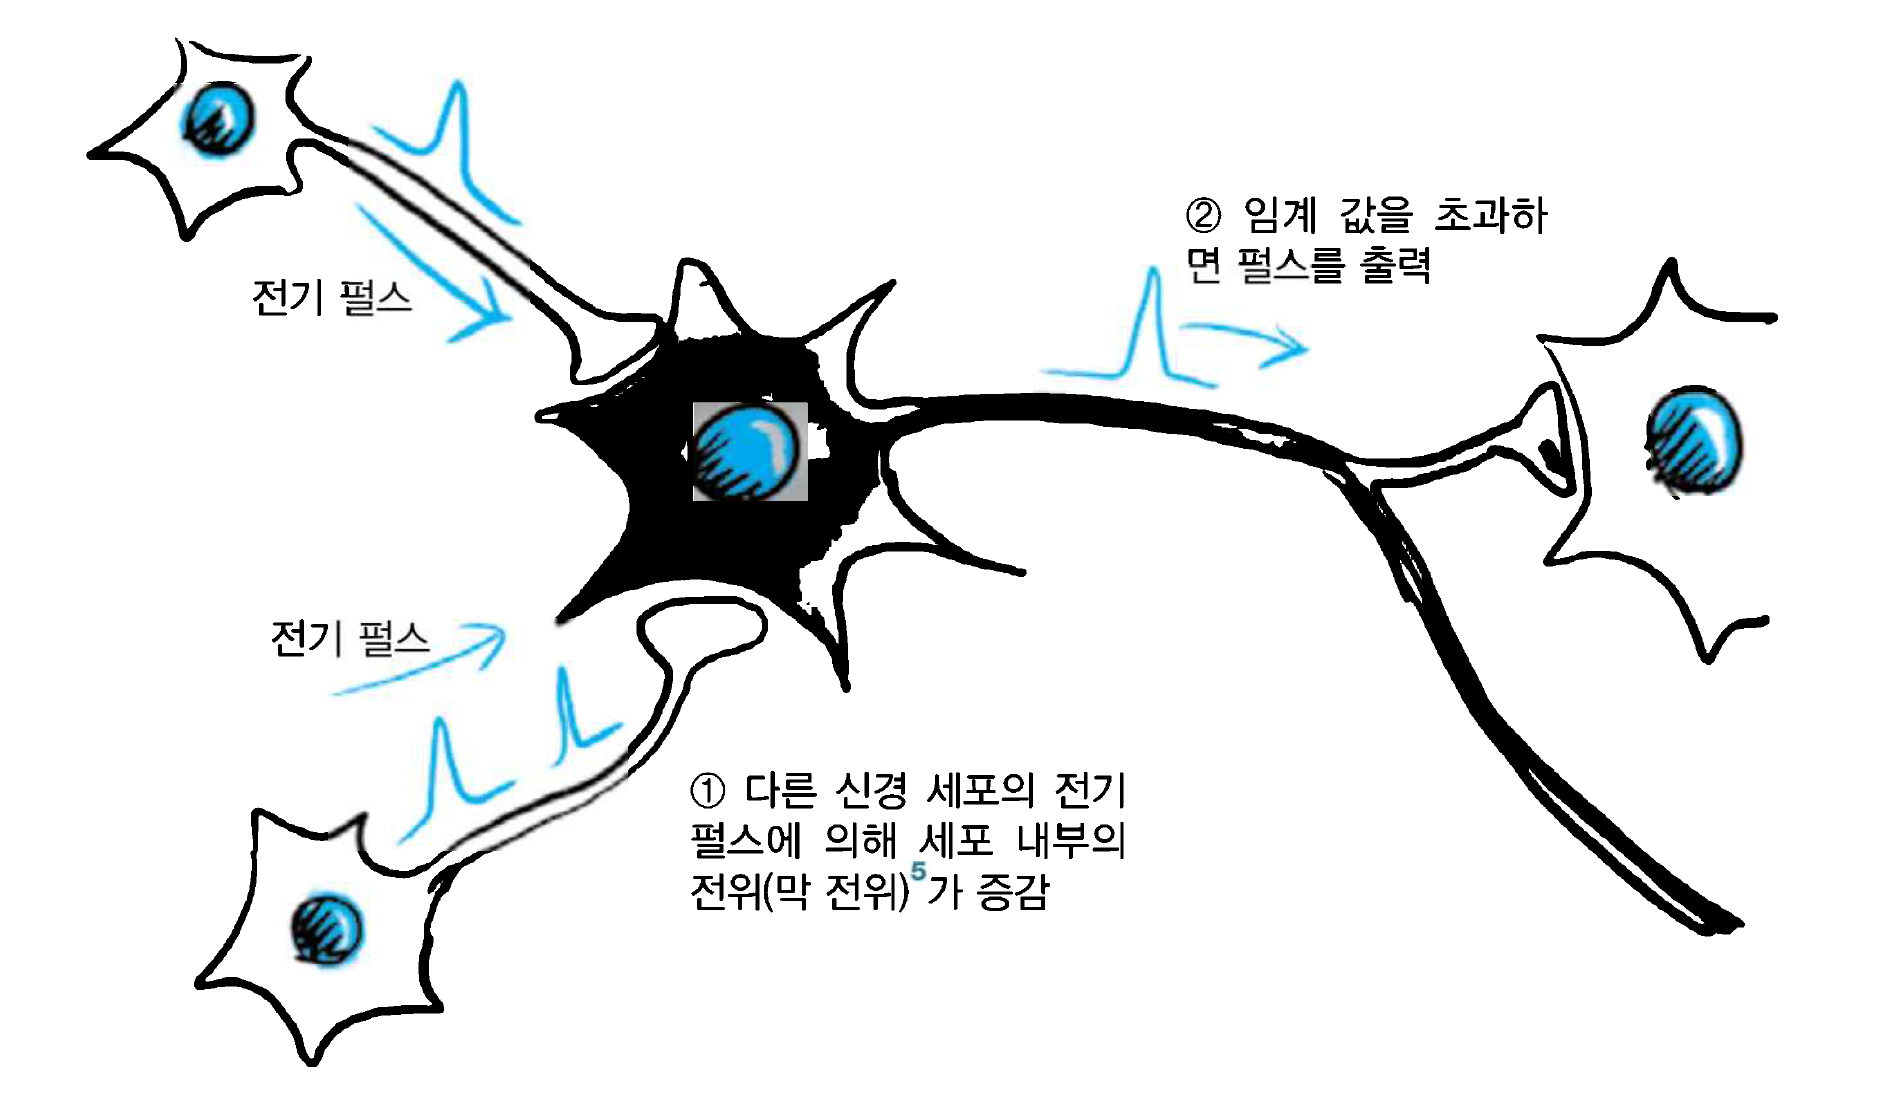

위의 그림과 같이 신경 세포는 축삭이라는 케이블을 가지고 있으며, 이 축삭을 사용하여 전기적 펄스를 다른 신경 세포에 전달한다.

축삭은 시냅스라고 불리는 인터페이스를 통해 펄스를 다음 신경 세포에 전달한다.

- 7.1.2 뉴런 모델

신경 세포의 움직임을 단순화한 뉴런 모델을 설명한다. 뉴런에 2개의 입력 x = (x_0, x_1)가 들어오는 것을 가정한다.

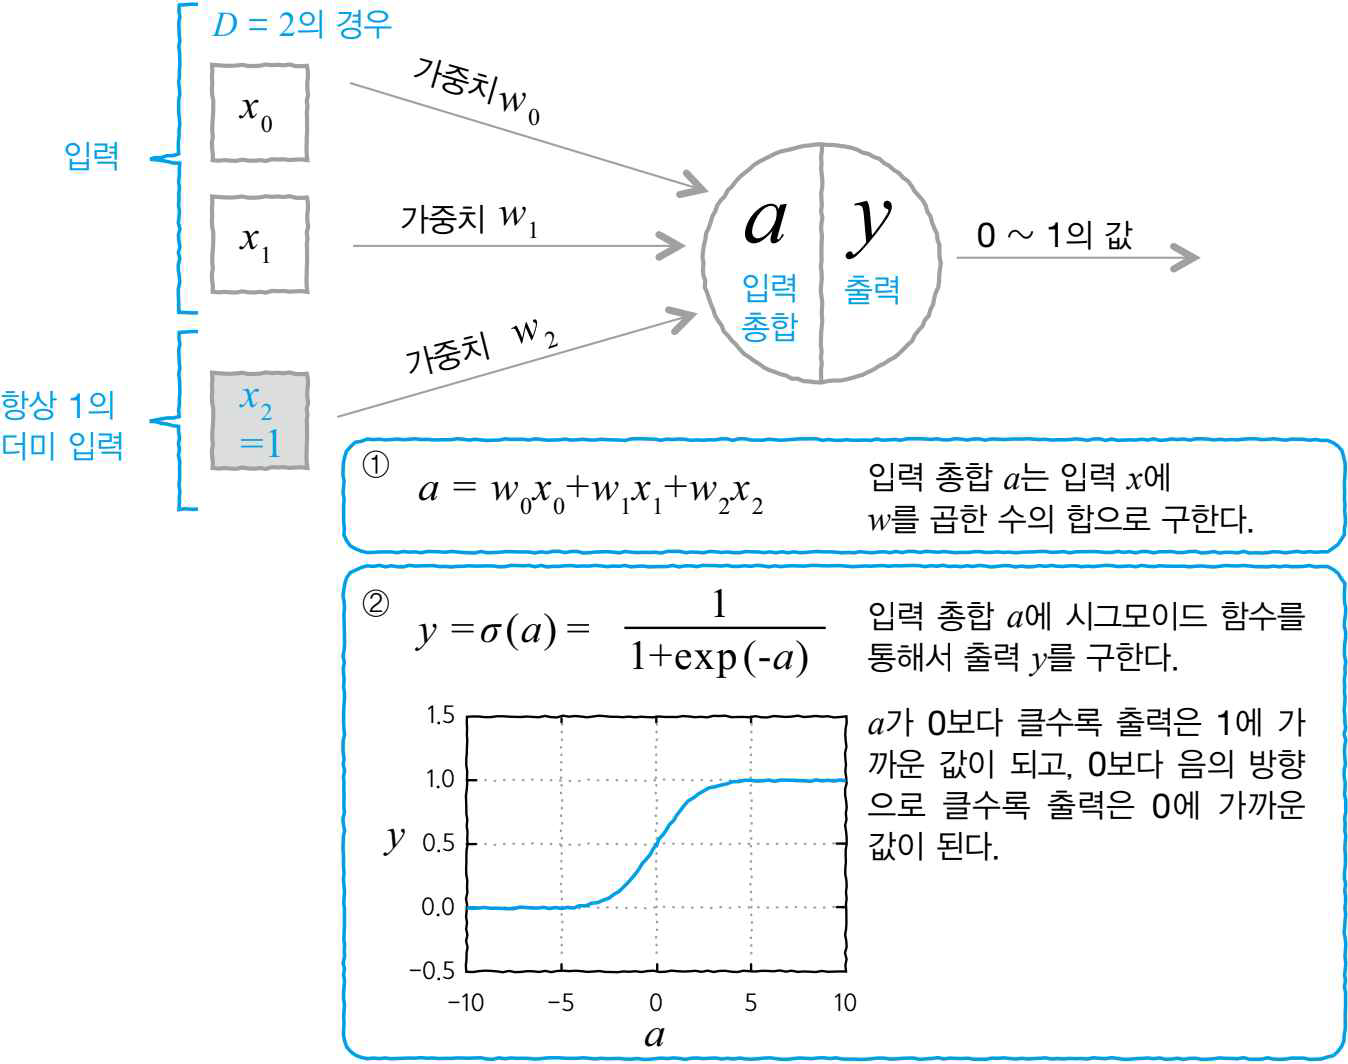



$$ a = w_0x_0 + w_1x_1 + w_2 $$

위의 식과 같이 각각 입력에 대한 시냅스 전달 강도를 w0, w1로 하며, 이들을 곱해서 모든 입력으로 합을 얻은 상수 w2를 더한 것을 입력 총합 a로 한다.

이전에 다뤘던과 같이 w_2는 매개변수이며, 항상 1을 갖는 3번째 입력 x_2가 있다고 가정하여 아래와 같은 식이 나올수 있다.

$$ a = \sum_{i=0}^{2}w_ix_i  $$



또한 입력 총합 a에 시그모이드 함수에 적용시킨 뉴런의 출력값을 y로 한다.

$$ y = \frac{1}{1+exp(-a)}  $$

y 는 0~1 까지 연속된 값을 가지며, 실제로 신경 세포의 출력은 0 or 1이지만 여기서는 단위 시간당 펄스 수, '발화 빈도'를 나타내고 있다고 생각한다.

a가 클수록 발화 빈도는 한계값인 1에 가까워지고, 반대로 a가 음의 큰 값을 취할수록 발화 빈도는 0에 가까워지며 거의 발화하지 않은 상태가 된다.



만약 D차원(다차원)일 경우는 아래와 같은 식으로 풀어나갈 수 있다.

$$ a = \sum_{i=0}^{D}w_ix_i  $$

$$ y = \frac{1}{1+exp(-a)}  $$

여기서 x_d(마지막 x값) 은 항상 1의 값을 갖는 더미 입력이다.

이는 D차원의 입력 공간을 D-1차원 평면과 같은 공간에서 2개로 나눈다고 말할 수 있다.


N개의 데이터셋 (x_n, t_n)에 대한 뉴런 모델의 학습 방법은 아래와 같다.

먼저, 목적 함수는 평균 교차 엔트로피 오차이다.

$$ E(w) = -\frac{1}{N}\sum_{n = 0}^{N-1}(t_nlny_n + (1-t_n)ln(1-y_n))$$

이 오차 함수의 매개 변수에 대한 기울기는 아래와 같다.

$$ \frac{\partial E}{\partial w_i} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)x_ni$$

매개 변수의 학습 법칙은 위의 기울기를 사용하여 아래와 같은 식으로 도출된다.

$$ w_i(t+1) = w_i(t) - α\frac{\partial E}{\partial w_i}$$

### 7.2 신경망 모델

- 7.2.1 2층 피드 포워드 신경망

뉴런의 집합체 모델을 신경망 모델이라고 한다. 신경망 모델은 되돌아가는 경로없이 한 방향으로만 흐르는 '피드 포워드 신경망'을 고려한다.

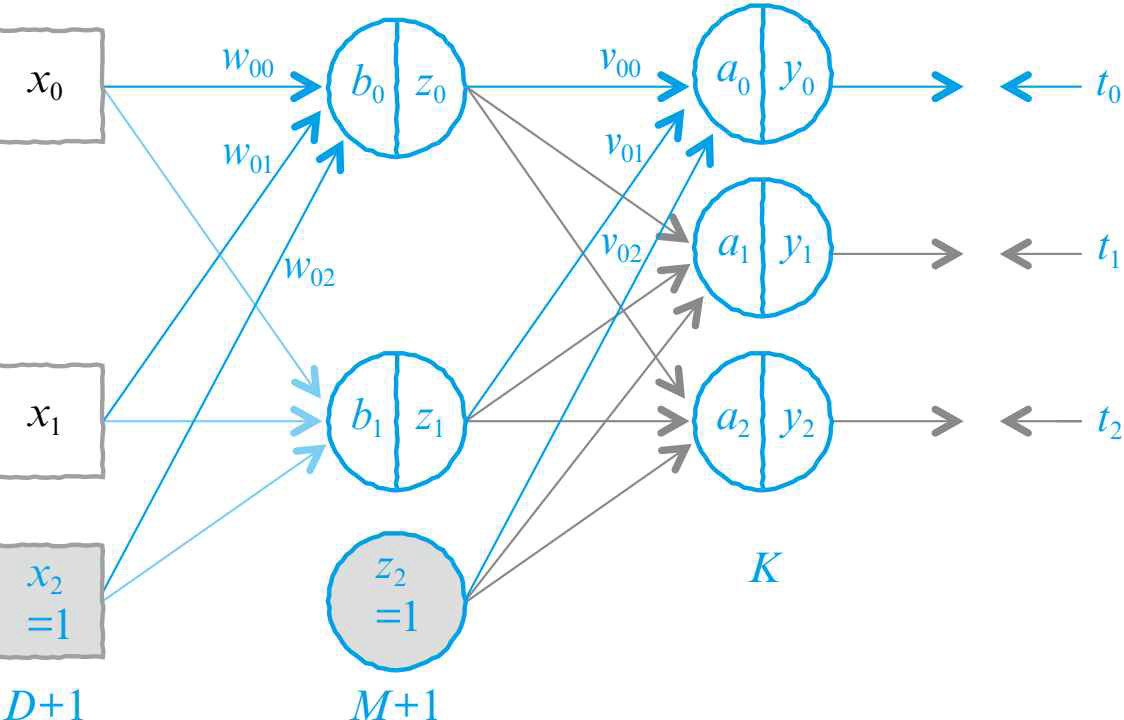







위의 그림과 같이 중간층 2개의 층에 의해 2층이라고 불린다.

출력은 3개이기에 주어진 수치를 3개의 카테고리로 분류할 수 있다.

각각의 출력 뉴런의 출력 값이 각각의 카테고리에 속하는 확률을 나타내도록 학습을 시킨다

<br></br>
i번째 입력부터 j번째 뉴런에 대한 가중치를 w_(ji)와 같이 쓰기로 하고, j번째 뉴런의 입력 총합을 b_j로 한다.

$$ b_j = \sum_{i = 0}^{2}w_{ji}x_i $$



가중치 w의 인덱스가 2개가 있다. 인덱스 방향은 왼쪽방향이며, 입력 총합의 수식에서 동일한 인덱스가 나란히 줄 서는 법칙이 생기고, 행렬 표기에 대응되는 이점이 있다.

아래와 같은 그림으로 설명할 수 있다.

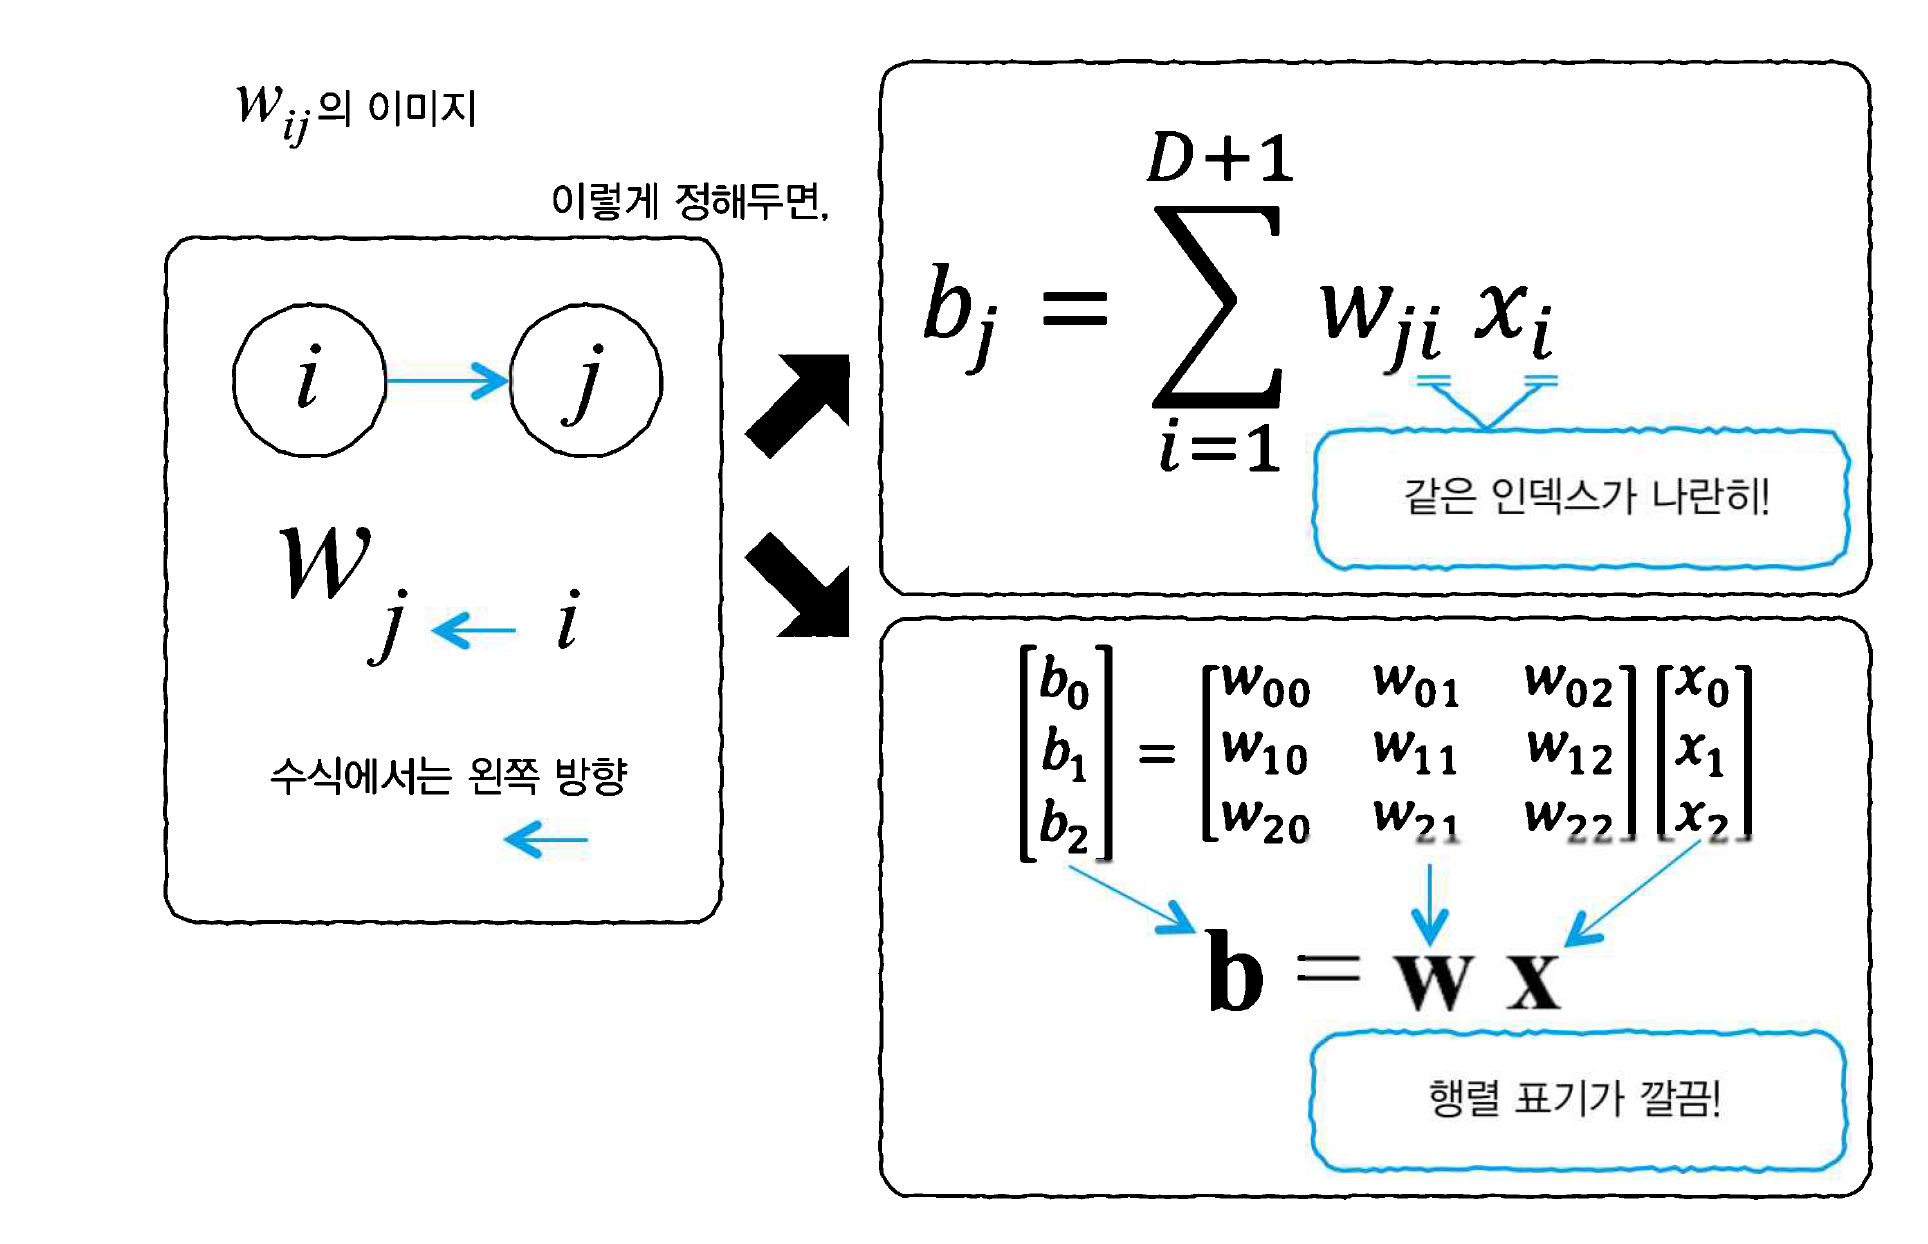

$$ b_j = \sum_{i = 0}^{2}w_{ji}x_i $$

위의 식에 입력 총합을 시그모이드 함수에 적용하여 중간층 뉴런의 출력 Z를 얻는다.

$$ Z_j = h(b_j) $$

h는 시그모이드 함수를 다르게 쓴것이며, 입력 총합에서 출력을 결정하는 함수라는 의미에서 활성화 함수라고 한다.


중간층의 출력 후에 출력층 뉴런의 활동이 정해지며, 중간층 j번째 뉴런부터 출력층 k번째 뉴런의 가중치를 V_kj로 나타낸다.

출력층 번호 k번째의 뉴런의 입력 총합 a_k는 아래의 식과 같이 나타낸다.

$$ a_k = \sum_{j=0}^2v_{kj}z_j $$

z_2는 항상 1의 값을 출력하는 더미 뉴런이며, 바이어스 항을 합에 포함시킨다.

출력층의 출력 y_k는 소프트맥스 함수를 사용하여 아래의 식과 같이된다.

$$ y_k = \frac{exp(a_k)}{\sum_{l=0}^2exp(a_l)} = \frac{exp(a_k)}{u} $$

소프트맥스 함수를 사용했기 때문에 출력 y_k = y_o + y_1 + y_2 = 1 이 되어 각 클래스에 대해 확률적 해석이 가능해진다.

입력 차원을 D, 중간층 뉴런의 수를 M, 출력 차원을 K로 한 경우, 네트워크는 아래와 같이 정리 될 수 있다.

- 중간층의 입력 총합:

$$ b_j = \sum_{i=0}^{D}w_{ji}x_i $$

- 중간층의 출력:

$$ z_j = h(b_j) $$

- 출력층의 입력 총합:

$$ a_k = \sum_{j=0}^{M}v_{kj}z_j  $$

- 출력층의 출력


$$ y_k = \frac{exp(a_k)}{\sum_{l=0}^{K-1}exp(a_l)} = \frac{exp(a_k)}{u} $$

여기서 X_D와 Z_M은 각각 항상 1의 값을 갖는 더미 입력과 더미 뉴런이다.

위의 총합에서 합을 취하는 횟수는 더미 뉴런 까지 D+1 , M+1이 된다.

- 7.2.2 2층 피드 포워드 신경망의 구현

In [ ]:
import numpy as np

np.random.seed(seed=1)
N = 200
K = 3
T = np.zeros((N,3), dtype=np.uint8)
X = np.zeros((N,2))
# x0의 범위
X_range0 = [-3, 3]
# x1의 범위
X_range1 = [-3, 3]
# 분포의 중심
Mu = np.array([[-.5,-.5], [.5, 1.0], [1, -.5]])
# 분포의 분산
Sig = np.array([[.7,.7], [.8, .3], [.3, .8]])
# 각 분포에 대한 비율
Pi = np.array([0.4, 0.8, 1])

for n in range(N):
  wk = np.random.rand()
  for k in range(K):
    if wk < Pi[k]:
      T[n,k] = 1
      break

  for k in range(2):
    X[n,k] = np.random.randn() * Sig[T[n,:] == 1, k] + Mu[T[n,:] == 1, k]

# 분류 데이터를 테스트 훈련 데이터로 분할

TestRatio = 0.5
X_n_training = int(N* TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training : , : ]
T_train = T[:X_n_training, :]
T_test = T[X_n_training : , : ]

# 데이터 저장

np.savez('class_data.npz', X_train=X_train, T_train = T_train, X_test=X_test, T_test=T_test, X_range0=X_range0, X_range1 = X_range1)

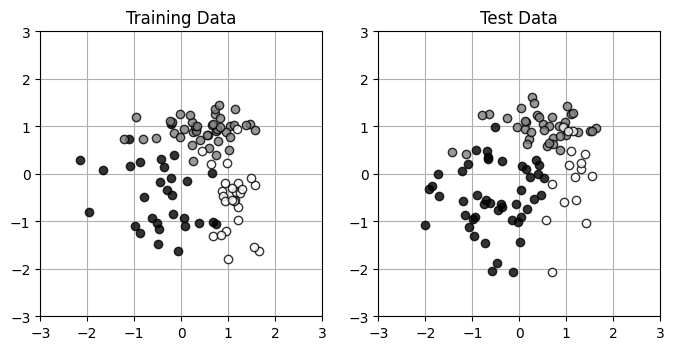

In [ ]:
# 분할한 데이터를 그려보기

import matplotlib.pyplot as plt

def Show_data(x, t):
  wk, n = t.shape
  c = [[0,0,0],[.5,.5,.5],[1,1,1]]
  for i in range(n):
    plt.plot(x[t[:,i] == 1,0], x[t[:,i] == 1, 1],
             linestyle='none', marker= 'o', markeredgecolor='black',
             color = c[i], alpha=0.8)
    plt.grid(True)

# 메인

plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

2층의 피드 포워드 신경망을 정의하는 함수를 FNN으로 한다.

여기서 Input은 D차원 벡터이며, 출력 y는 K차원 벡터이다.

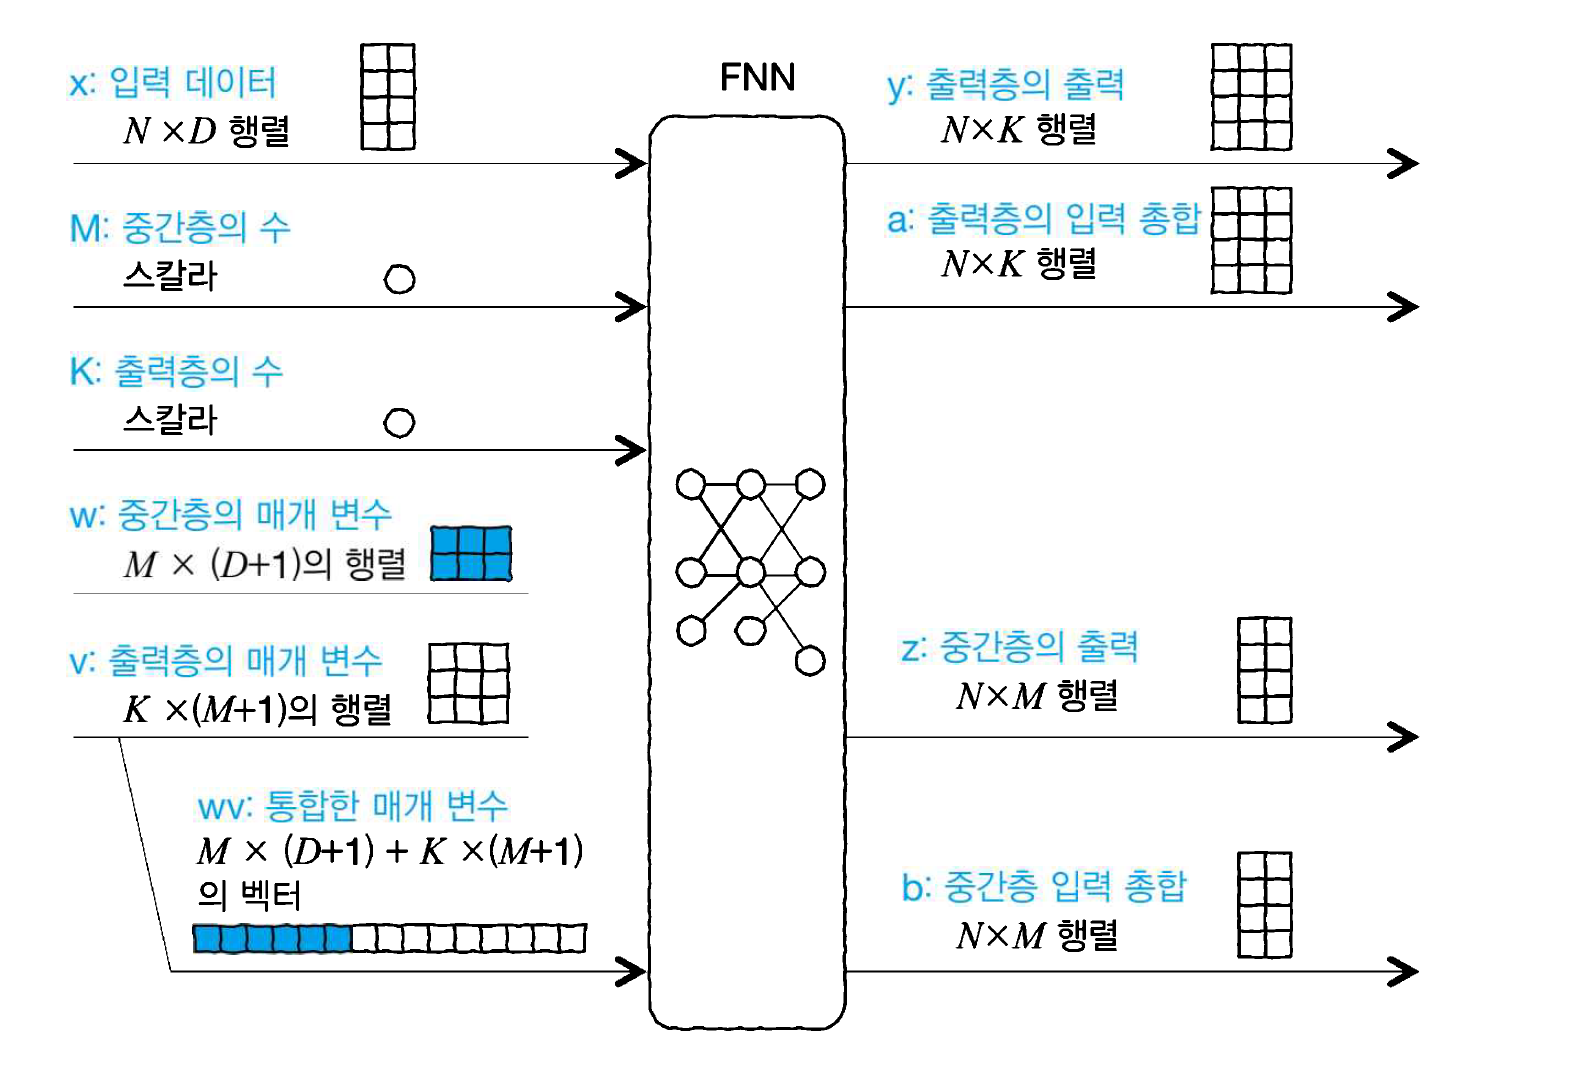

위의 그림과 같이 x를 데이터 수 N x D차원의 행렬로, y를 데이터 수 N x K차원의 행렬로 한다.

중간층 가중치 W와 출력층 가중치 V도 네트워크에 전달한다.

W는 M x (M+1)의 행렬이다. W와 V의 정보는 한덩어리로 한 벡터 wv로 전달하며 중간층 뉴런 수 M = 2, 출력차수 K = 3의 경우를 상정하여 다음 가중치를 네트워크에 전달하고자 한다.

w = 2 x 3의 행렬, v = 3 x 3의 행렬인 경우에; wv는 w와 v의 행렬을 일자로 펼쳐놓은 행렬로 된다.




In [ ]:
# 시그모이드 함수

def Sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y

def FNN(wv, M, K, x):
  N, D = x.shape           #  입력 차원
  w = wv[:M * (D+1)]       # 중간층 뉴런의 가중치
  w = w.reshape(M, (D+1))
  v = wv[M * (D + 1):]     # 출력층 뉴런의 가중치
  v = v.reshape((K, M+1))
  b = np.zeros((N, M+1))   # 중간층 뉴런의 입력 총합
  z = np.zeros((N, M+1))   # 중간층 뉴런의 출력
  a = np.zeros((N, K))     # 출력층 뉴런의 입력 총합
  y = np.zeros((N, K))     # 출력층 뉴런의 출력

  for n in range(N):
    # 중간층의 계산
    for m in range(M):
      b[n, m] = np.dot(w[m, :],np.r_[x[n,:], 1])
      z[n,m] = Sigmoid(b[n,m])

    # 출력층의 계싼

    z[n, M] = 1
    wkz = 0
    for k in range(K):
      a[n, k] = np.dot(v[k, :], z[n, :])
      wkz = wkz + np.exp(a[n, k])

    for k in range(K):
      y[n, k] = np.exp(a[n, k]) / wkz

  return y, a, z, b


# test

WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

WV는 길이가 15인 가중치 벡터이며 WV의 요소 모두를 1로 하여, 입력으로 X_train의 두 데이터만 입력했을 때의 출력이 표시됨.

위에서부터 y, a, z, b의 값이다.

- 7.2.3 수치 미분법

2층의 피드 포워드 네트워크에서 3분류 문제 풀기를 생각한다.

오차 함수는 아래와 같이 평균 교차 엔트로피 오차를 사용한다.

$$ E(w,v) = 1\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}log(y_{nk})  $$

In [ ]:
# 평균 교차 엔트로피 오차를 코드로 구현

def CE_FNN(wv, M, K, x, t):
  N, D = x.shape
  y, a, z, b = FNN(wv, M, K, x)
  ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
  return ce

# test

WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

CE_FNN은 FNN과 마찬가지로 w + v = wv를 입력한다.

또한 네트워크 크기를 결정하는 M과 K, 그리고 입력 데이터 X와 목표 데이터 t를 입력한다.

내부에서 FNN이 x에 대한 y를 출력하고, y와 t를 비교하여 크로스 엔트로피가 계산된다.

기존에 기울기를 계산하기 위해선 일정 지점에 편미분을 하여 거기에 마이너스를 곱한 방향으로 w를 갱신하는 방법이었다.

하지만 여기서는 w의 조금 앞의 지점(w - ϵ)과 조금 앞선 지점 (w - ϵ)에서의 E(w + ϵ)의 값을 구하면 아래와 같이 기울기를 근사할 수 있다.

$$ \frac{∂E}{∂w}|_w ~= \frac{E(w + ϵ) - E(w - ϵ)}{2ϵ} $$

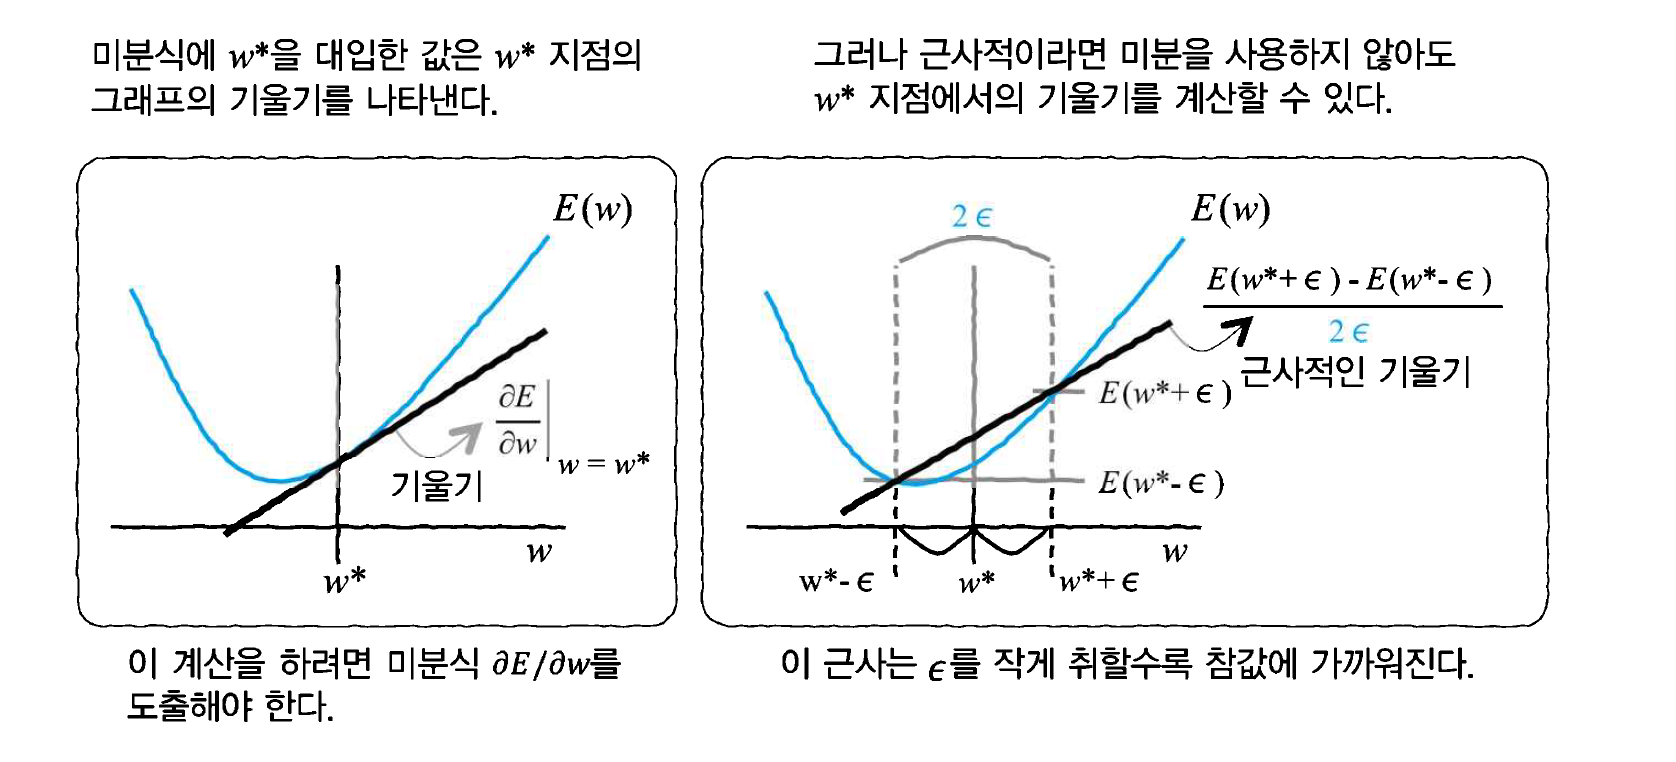

매개 변수가 3개라고 했을때의 위의 접근법으로 대입하자면 아래와 같은 식을 도출할 수 있다.



$$ \frac{∂E}{∂w_0}|_{w_0, w_1, w_2} ~= \frac{E(w_0 + ϵ, w_1, w_2) - E(w_0 - ϵ, w_1, w_2)}{2ϵ} $$


In [ ]:
# 수치 미분

def dCE_FNN_num(wv, M, K, x, t):
  epsilon = 0.001
  dwv = np.zeros_like(wv)
  for iwv in range(len(wv)):
    wv_modified = wv.copy()
    wv_modified[iwv] = wv[iwv] - epsilon
    mse1 = CE_FNN(wv_modified, M, K, x, t)
    wv_modified[iwv] = wv[iwv]+ epsilon
    mse2 = CE_FNN(wv_modified, M, K, x, t)
    dwv[iwv] = (mse2 - mse1) / (2 * epsilon)

  return dwv

# dVW의 표시
def Show_WV(wv, M):
  N = wv.shape[0]
  plt.bar(range(1,M*3 + 1), wv[:M * 3], align="center", color= 'black')
  plt.bar(range(M * 3 + 1, N+1), wv[M*3:], align="center", color='cornflowerblue')
  plt.xticks(range(1, N+1))
  plt.xlim(0, N+ 1)

# test

M = 2
K = 3
nWV = M * 3 + K *(M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5,3))
Show_WV(dWV, M)
plt.show()

NameError: name 'CE_FNN' is not defined

- 7.2.4 수치 미분법에 의한 경사 하강법

이전과는 다르게 입력에 학습시키는 가중치의 초기값으로 wv_init를 넣는다.

over fitting의 확인을 위해 test dataset도 추가한다.

n은 학습단계수로 alpha는 학습 상수이다.

Fit_FNN_num의 출력은 최적화된 매개 변수인 wvt이다.

In [ ]:
# step을 1000으로 가정하여 학습을 함

import time

# 수치 미분을 사용한 경사 하강법
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n ,alpha):
  wvt = wv_init
  err_train = np.zeros(n)
  err_test = np.zeros(n)
  wv_hist = np.zeros((n, len(wv_init)))
  epsilon = 0.001

  for i in range(n):
    wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
    err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
    err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
    wv_hist[i, :] = wvt

  return wvt, wv_hist, err_train, err_test

# 메인

startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M*3 + K * (M + 1))
N_step = 1000
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time : {0:.3f} sec".format(calculation_time))

Calculation time : 159.083 sec


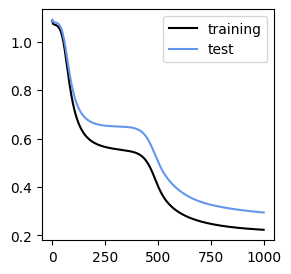

In [ ]:
# 학습 오차의 표시 -> 결과값

plt.figure(1, figsize=(3,3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label= 'test')
plt.legend()
plt.show()

위의 그래프에 400단계 부근에서 학습이 수렴한 것처럼 움직이지 않지만 또, 급격히 학습이 진행되고 있다.

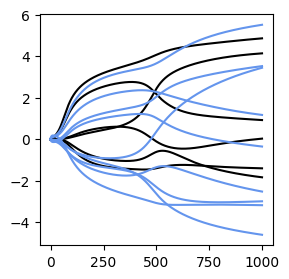

In [ ]:
# 가중치 시간 변화의 표시

plt.figure(1, figsize=(3,3))
plt.plot(WV_hist[:, :M *3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

검정색은 중간층의 가중치이며 파란색은 출력층의 가중치이다.

여기서 보면 400단계부근에서 가중치 그래프가 교차하고 있고, 오차 함수의 기울기의 방향이 변화하는 것을 의미한다.

즉, 가중치가 안정점(Saddle point)를 통과했기 때문일 수도 있다.

여기서 Saddle point은 어느 방향은 계곡, 다른 방향으로는 산이 되는 지점이다.

다시말해서 다변수 실함수 번역에서, 어느 방향에서 보면 극대값이지만 다른 방향에서 보면 극솟값이 되는 점이다.

이차원의 시각에서 어느 방향에서 보면 아래로 굽어 있지만 다른 방향에서 보면 위로 굽어 있는 전형적인 모양이 고개 모양 혹은 안장과 닮았다고 해서 붙여졌다.



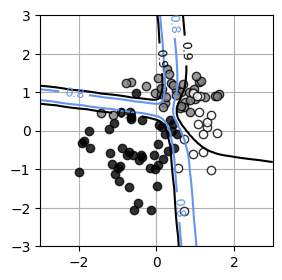

In [ ]:
# 데이터 공간 클래스 0, 1, 2로 판정하는 영역의 경계선을 아래에 표시하여 본다.
# 가중치 매개 변수 wv를 전달하면, 표시할 입력 공간을 60x60로 분할하고, 모든 입력에 대해 네트워크의 출력을 확인합니다.
# 각각의 카테고리에서 0.5 or 0.9이상의 출력을 얻을 수 있는 영역을 등고선을 표시해본다.

# 경계선 표시 함수

def show_FNN(wv, M, K):
  xn = 60
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
  y, a, z, b = FNN(wv, M, K, x)
  plt.figure(1, figsize= (4,4))
  for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.8, 0.9],
                       colors=['cornflowerblue', 'black'])
    cont.clabel(fmt = '%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)

# 경계선 표시

plt.figure(1, figsize=(3,3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

- 7.2.5 오차 역전파법

오차 역전파법 : 피드 포워드 신경망에 학습시키는 방법

네트워크의 출력에서 발생하는 오차의 정보를 사용하여, 출력층의 가중치 v_kj에서 중간층에 가중치 w_ji으로 입력 방향의 반대로 가중치를 갱신해나감

경사 하강법을 피드 포워드 네트워크에 적용하면 오차 역전파법이 자연스럽게 도출된다. 그렇기에 오차 역전파법은 경사하강법으로 볼수있다.

<br></br>

$$ E(w,v) = -\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}ln(y_{nk})  $$

경사 하강법을 적용하기 위해 오차 함수를 매개 변수로 편미분한다. 여기서는 클래스 분류를 하기 때문에 오차함수는 평균 교차 엔트로피 오차를 생각한다.

$$ E(w,v) = -\sum_{k=0}^{K-1}t_{k}ln(y_{k})  $$

하나의 데이터 n에만 해당하는 상호 엔트로피 오차 E_n을 위와 같이 정의한다.

그리고 기존식을 아래와 같이 나타낸다.

$$ E(w,v) = \frac{1}{N}\sum_{n=0}^{N-1}E_n(w, v)  $$

평균 상호 엔트로피 오차 -> 데이터 각각의 상호 엔트로피 오차의 평균으로 해석

경사 하강법에서 사용하는 E의 매개 변수에 대한 편미분을 통해, 본래 목적인 각 데이터 n에 대한 평균을 구할 수 있다.

$$ \frac{\partial E}{\partial w_{ji}} = \frac{\partial}{\partial w_{ji}}\frac{1}{N}\sum_{n=0}^{N-1}E_n = \frac{1}{N}\sum_{n=0}^{N-1}\frac{\partial E_n}{\partial w_{ji}} $$

- 7.2.6 ∂E_n / ∂v_kj을 구하기

편미분의 연쇄율을 사용하여 두 미분의 곱으로 분해한다.

$$ \frac{∂E}{∂v_{kj}} = \frac{\partial E}{\partial a_k}\frac{\partial a_k}{\partial v_{kj}}  $$



$$ E(w,v) = -\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}ln(y_{nk})  $$

위의 식을 사용하여 E 부분을 적으면 아래와 같이 t와 y에서만 쓸 수 있다.

$$ \frac{\partial E}{\partial a_0} = \frac{\partial}{\partial a_0}(-t_0logy_o - t_1logy_1 - t_2logy_2)  $$

여기서 t_k는 지도 신호이기 때문에 네트워크의 출력인 y_k와 입력 총합 a_0와 관계하고 있다.

그래서 t_k는 상수, y_k는 a_0의 함수로 위의 식을 확장하면 아래와 같은 식을 얻을 수 있다.


$$ \frac{\partial E}{\partial a_0} = -t_0\frac{1}{y_0}\frac{\partial y_0}{\partial a_0}-t_1\frac{1}{y_1}\frac{\partial y_1}{\partial a_0}-t_2\frac{1}{y_2}\frac{\partial y_2}{\partial a_0}  $$

∂y_0 / ∂a_0 부분은 y가 a의 소프트맥스 함수로 만들어져 있기 때문에, 아래와 같은 식으로 표현이 가능하다.

$$ \frac{\partial y_0}{\partial a_0} = y_0(1-y_0)$$

$$ \frac{\partial y_1}{\partial a_0} = -y_0y_1$$

$$ \frac{\partial y_2}{\partial a_0} = -y_0y_2$$

<br></br>
위에 대한 식을 기반으로 결론적으로 아래와 같이 도출된다.

$$ \frac{\partial E}{\partial a_0} = -t_0\frac{1}{y_0}\frac{\partial y_0}{\partial a_0}-t_1\frac{1}{y_1}\frac{\partial y_1}{\partial a_0}-t_2\frac{1}{y_2}\frac{\partial y_2}{\partial a_0} = -t_0(1-y_0) + t_1y_0 + t_2y_0 = (t_0 + t_1 + t_2)y_0 - t_0 = y_0 - t_0 $$


위의 식에서 y_0은 첫 뉴런의 출력, t_0은 그에 대한 지도 신호, y_0 - t_0은이다.

k = 1, 2의 경우도 위의 경우와 같이 정리하면 아래와 같이 나올 수 있다.

$$ \frac{\partial E}{\partial a_1} =  y_1 - t_1 $$

$$ \frac{\partial E}{\partial a_2} =  y_2 - t_2 $$

따라서, $$ \frac{∂E}{∂a_{k}} = y_k - t_k $$

또한 먼저 출력층(2층)의 오차를 나타내므로, 아래의 식과 같이 나타낸다

$$ \frac{∂E}{∂a_{k}} = δ_k^{(2)} $$

그리고 오차 함수에 제곱 오차를 사용하면 아래의 식을 얻을 수 있다.

$$ \frac{∂E}{∂a_{k}} = δ_k^{(2)} = (y_k - t_k)h^{`}(a_k) $$

h(x)는 출력층 뉴런의 활성화 함수이며, 활성화 함수로 시그모이드 함수를 사용한 경우 h`(x) = (1-σ(x))σ(x)가 된다.



$$ \frac{∂E}{∂v_{kj}} = \frac{\partial E}{\partial a_k}\frac{\partial a_k}{\partial v_{kj}}  $$

의 식에서 ∂a_k/∂v_kj를 생각한다.

또한 k= 0의 경우를 ㅅ생각하면 아래의 식과 같다.

$$ a_0 = v_{00}z_0 + v_{01}z_1 + v{02}z_2  $$

그래서 정리를 하면 아래와 같은 식이 된다.

$$ \frac{∂a_0}{∂v_{00}} = z_0  $$

$$ \frac{∂a_0}{∂v_{01}} = z_1  $$

$$ \frac{∂a_0}{∂v_{02}} = z_2  $$

위의 식을 정리하여 쓰면 아래의 식과 같다

$$ \frac{∂a_0}{∂v_{0j}} = z_j  $$

k가 다른 경우에도 이를 도입할 수 있게 아래와 같이 표기할 수도 있다.

$$ \frac{∂a_k}{∂v_{kj}} = z_j  $$


위의 식을 정리하면

$$ \frac{∂E}{∂v_{kj}} = \frac{∂E}{∂a_{k}}\frac{∂a_k}{∂v_{kj}} = (y_k - t_k)z_j = δ_k^{(2)}z_j $$

따라서 갱신 규칙은 아래와 같다.

$$ v_{kj}(t+1) = v_{kj}(t) - α\frac{\partial E}{\partial v_{kj}} = v_{kj}(t) - αδ_k^{(2)}z_j $$



- 7.2.7 ∂E_n / ∂w_ji를 구하기

입력층에서 1층의 가중치 매개 변수 w_ji의 학습 법칙을 도출하면 오차함수 E를 w_ji로 편미분 할 것이다.

$$ \frac{∂E}{∂w_{ji}} = \frac{∂E}{∂b_j}\frac{∂b_j}{∂w_{ji}} $$

위의 식에서 중간층 뉴런의 입력 총합에서 편미분을 출력층의 입력 총합의 미분와의 유사성으로 도출한 식을 아래와 같이 정리한다.

$$ \frac{∂E}{∂ㅠ_{j}} = δ_j^{(1)} $$

(1) : 1층(중간층)임을 의미

$$ \frac{∂E}{∂w_{ji}} = \frac{∂E}{∂b_j}\frac{∂b_j}{∂w_{ji}} $$

두번째 단락은 아래와 같음.

$$ \frac{∂b_j}{∂w_{ji}} = \frac{∂}{∂w_{ji}}\sum_{i=0}^{D}w_{ji}x_i = x_i $$

따라서 w_ji의 갱신 규칙은 아래와 같이 된다.

$$ w_{ji}(t+1) = w_{ji}(t) - α\frac{\partial E}{\partial w_{ji}} = w_{ji}(t) - αδ_j^{(1)}x_i  $$

여기서 \delta _j^(1)가 무엇인지 편미분 연쇄 규칙을 사용하여 아래와 같이 전개를 할 수 있다.

$$ δ_k^{(1)} = \frac{∂E}{\partial b_j} = \sum_{k=0}^{K-1}\frac{\partial E}{\partial a_k} \frac{\partial a_k}{\partial a_j}\frac{∂z_j}{\partial b_j} $$



또한 분해한 첫번째 ∂E/ ∂a_k는 δ_k^(2)으로 나타낼 수있다.

두번째 ∂a_k / ∂z_j는 아래와 같다.

$$ \frac{∂a_k}{∂z_j} = \frac{∂}{∂z_j}\sum_{j=0}^{M} v_{kj}z_j = v_{kj} $$

또한 세번째 ∂z_j/∂b_j는 중간층의 활성화 함수 h()로 하면 아래와 같이 표시된다.

$$ \frac{∂z_j}{∂b_j} = \frac{∂}{∂b_j}h(b_j) = h`(b_j) $$

위의 식을 정리하면 아래와 같이 표시된다.

$$ δ_k^{(1)} = h`(b_j)\sum_{k=0}^{K-1} v_{kj}δ_k^{(2)}$$


위의 식에서 처음의 h`(b_j)는 활성화 함수의 미분이며 항상 양수이다. 다음의 합에는 대상의 오차인 delta를 v의 가중치로 모으는 형태가 되어 있다.

즉 delta_1는 결합한 곳에서 생긴 오차 delta_2를 반대 방향으로 전달시켜 계산한다고 볼 수 있다.


네트워크 매개 변수의 갱신 방법

1. 네트워크에 x를 입력하고 출력 y를 얻는다. 이때 중간에 계산된 b,z,a도 보유해둔다.

2. 출력 y를 목표 데이터 t와 비교해 그 차이(오차)를 계산한다. 이 오차는 출력층의 각 뉴런에 할당된다고 생각한다.

3. 출력층의 오차를 사용하여 중간층의 오차를 계산한다.

4. 결합 본래의 신호 강도와 결합처의 오차 정보를 사용하여 가중치 매개 변수를 갱신한다.



- 7.2.8 오차 역전파법의 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 해석적 미분

def dCE_FNN(wv, M, K, x, t):
  N, D = x.shape

  # wv을 w와 v로 되돌림
  w = wv[:M * (D+1)]
  w = w.reshape(M,(D+1))
  v = wv[M * (D+1):]
  v = v.reshape((K, M+1))

  y, a, z, b = FNN(wv,M,K,x)

  # 출력 변수의 준비

  dwv = np.zeros_like(wv)
  dw = np.zeros((M, D + 1))
  dv = np.zeros((K, M + 1))
  delta1 = np.zeros(M) # 1층 오차
  delta2 = np.zeros(K) # 2층 오차

  for n in range(N):
    # 출력층의 오차를 구하기
    for k in range(K):
      delta2[k] = (y[n,k]- t[n,k])

    # 중간층의 오차를 구하기
    for j in range(M):
      delta1[j] = z[n, j] * (1-z[n,j]) * np.dot(v[:, j], delta2)

    # v의 기울기 dv를 구하기
    for k in range(K):
      dv[k, :] = dv[k, :] + delta2[k] * z[n,:] / N

    # w의 기울기 dw를 구하기
    for j in range(M):
      dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n,:], 1] / N

    #dw와 dv를 합체시킨 dwv로 만들기

  dwv = np.c_[dw.reshape((1, M *(D+1))),
              dv.reshape((1, K * (M + 1)))]
  dwv = dwv.reshape(-1)
  return dwv

def Show_dWV(wv, M):
  N = wv.shape[0]
  plt.bar(range(1, M * 3 + 1), wv[:M * 3],
          align = "center", color='black')
  plt.bar(range(M * 3 + 1, N+1), wv[M*3:],
          align = "center", color = 'cornflowerblue')
  plt.xticks(range(1, N+ 1))
  plt.xlim((0, N + 1))

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


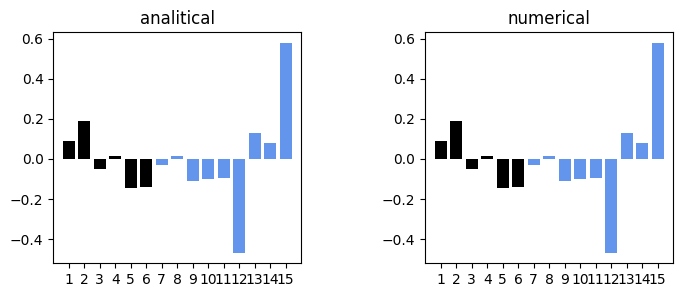

In [ ]:
# 동작 확인

M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)

plt.figure(1, figsize=(8,3))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')
plt.subplot(1,2,2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

In [ ]:
# 오차 역전파법으로 풀어보기

import time

# 해석적 미분을 사용한 경사 하강법

def Fit_FNN(wv_init, M, K, x_train, t_train,x_test, t_test, n , alpha):
  wv = wv_init.copy()
  err_train = np.zeros(n)
  err_test = np.zeros(n)
  wv_hist = np.zeros((n, len(wv_init)))
  epsilon = 0.001
  for i in range(n):
    wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train)
    err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
    err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
    wv_hist[i, :] = wv

  return wv,wv_hist, err_train, err_test

# 메인

startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M*3 + K * (M+1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time : {0:.3f}sec".format(calculation_time))

Calculation time : 21.370sec


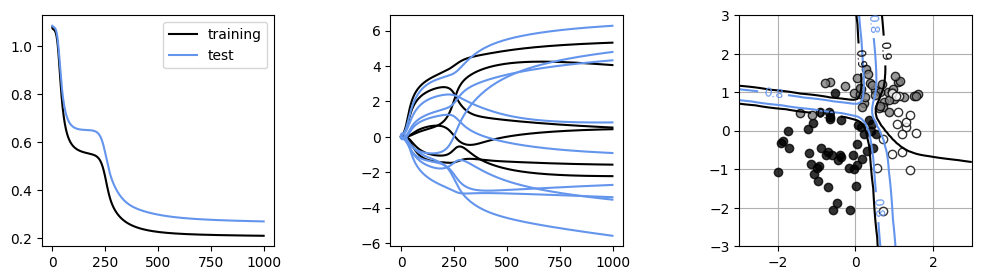

In [ ]:
# 수치 미분(경사하강법)에 비해 계산임 훨씬 빨리 끝나며 이전에 해석해적인 접근이 유효하다는 것을 실감할 수 있다.

plt.figure(1, figsize=(12,3))
plt.subplots_adjust(wspace=0.5)

# 학습 오차의 표시
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()

# 가중치의 시간 변화 표시
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')

# 경계선 표시
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()


여기서 해석해적인 접근이 상당히 빠르다는 것을 알수 있지만 수치 미분(경사하강법)이 전혀 유효하지 않은것이 아니다. 수치 미분은 도출된 미분 방정식이 맞는지 확인하는 도구가 될 수 있다.

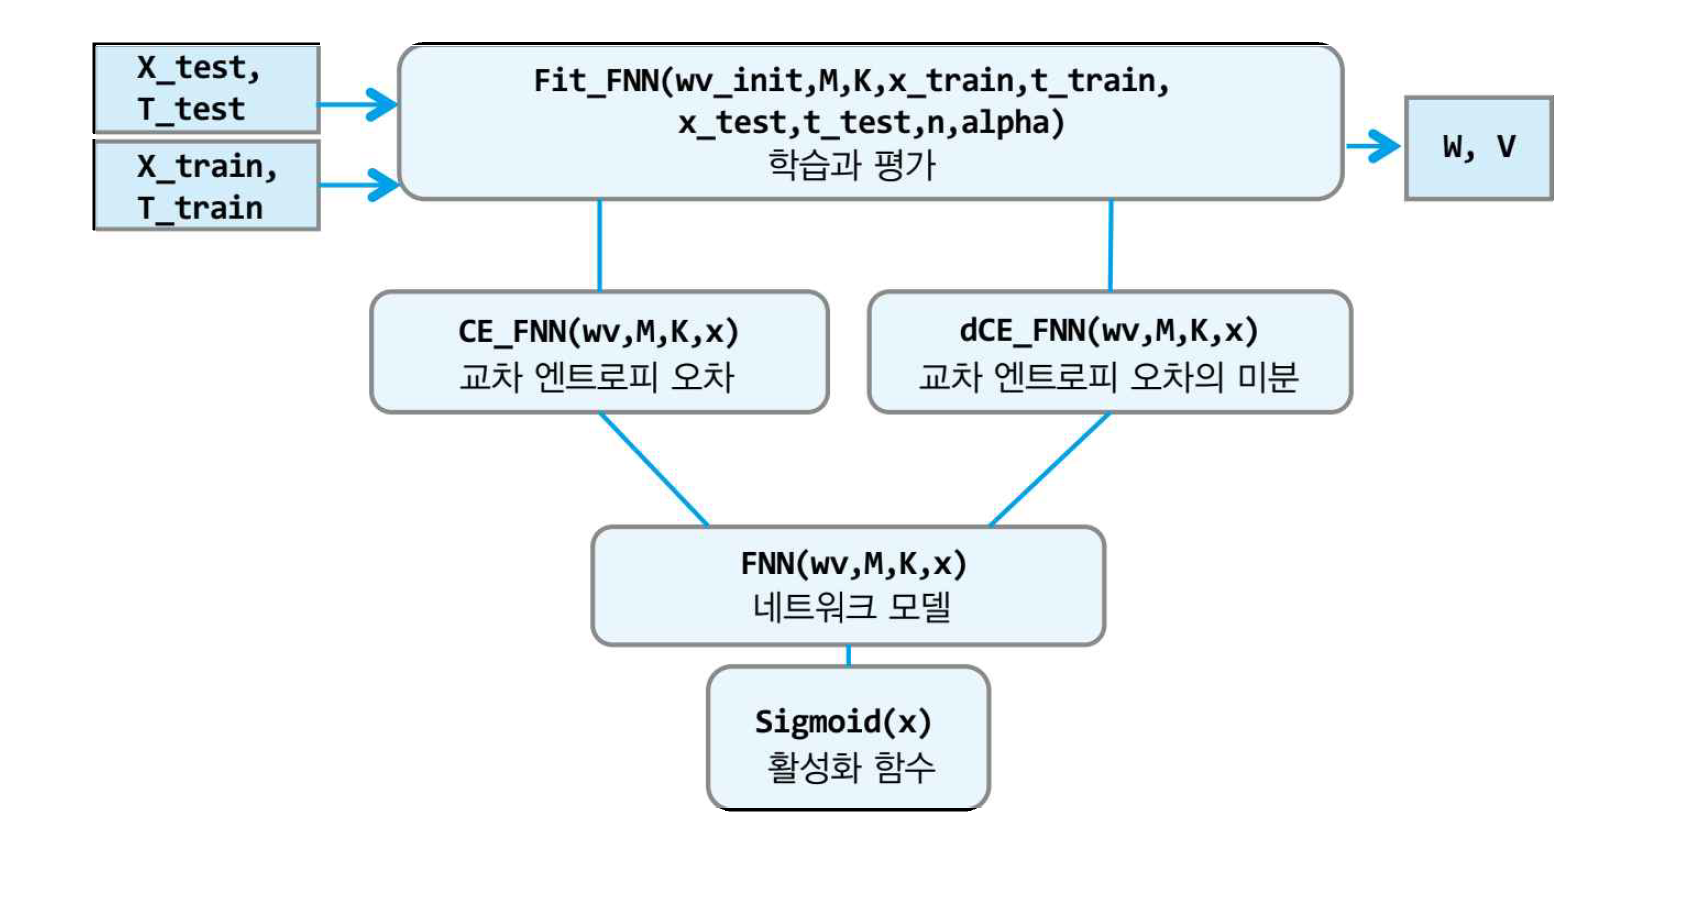

정리하자면 X, T의 train, test데이터로 부터 Fit_FNN으로 학습과 평가를하며, 이 가운데는 크로스 엔트로피를 줄이는 wv를 구하기 위해 크로스 엔트로피를 구하는 CE_FNN, 미분 dCE_FNN이 사용되고 있다.

또한 두 함수에서 네트워크 출력 FNN이 사용되고 있고, FNN에는 중간층 뉴런의 활성화 함수로 Sigmoid가 사용되고 있다.



- 7.2.9 학습 후 뉴런의 특성

2층의 네트워크에서 곡선의 경계선을 어떻게 만들었을까?

각 b, z, a, y의 특성을 나타내본다.

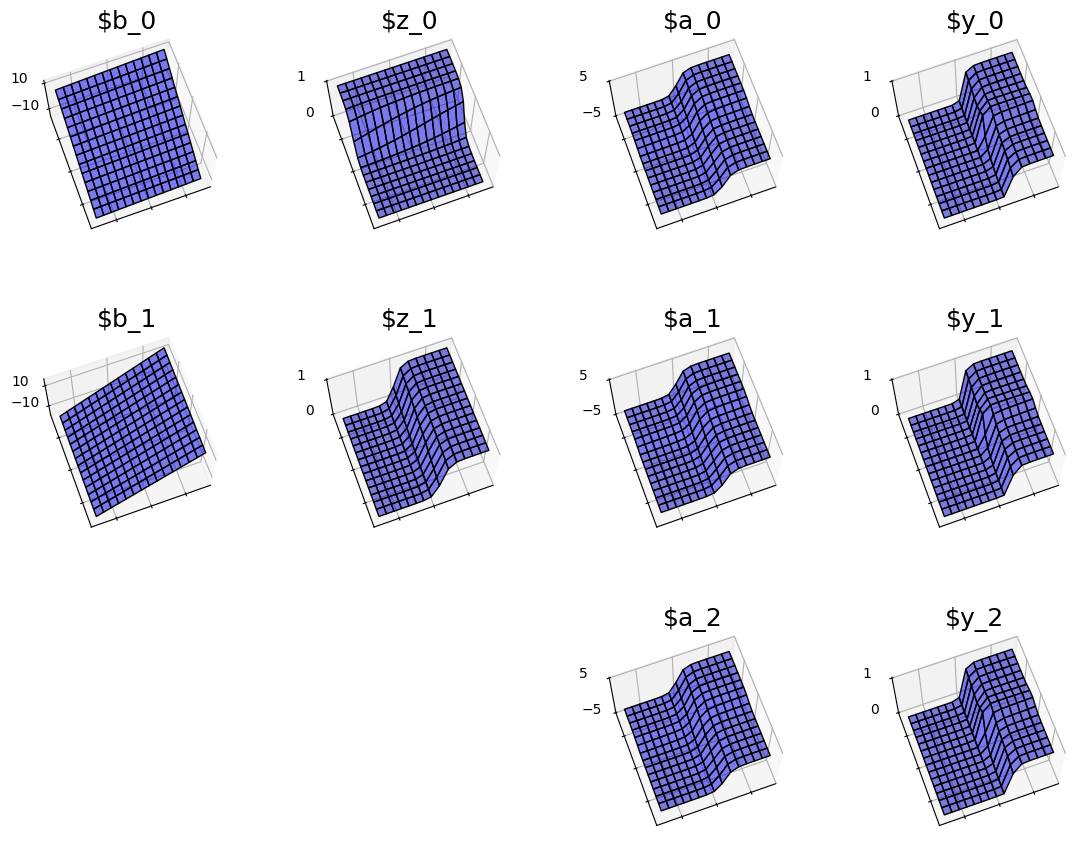

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def show_activation3d(ax, v, v_ticks, title_str):
  f = v.copy()
  f = f.reshape(xn, xn)
  f = f.T
  ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black',
                  rstride=1, cstride= 1, alpha=0.5)
  ax.view_init(70, -110)
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_zticks(v_ticks)
  ax.set_title(title_str, fontsize= 18)

M = 2
K = 3
xn = 15
x0 = np.linspace(X_range0[0],X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn*xn , 1)), np.reshape(xx1, (xn*xn, 1))]
y, a, z, b = FNN(WV, M, K, x)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
  ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
  show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}'.format(m))
  ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
  show_activation3d(ax, z[ :,m], [0, 1], '$z_{0:d}'.format(m))

for k in range(K):
  ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
  show_activation3d(ax, a[:, m], [-5, 5], '$a_{0:d}'.format(k))
  ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
  show_activation3d(ax, y[ :,m], [0, 1], '$y_{0:d}'.format(k))

plt.show()


각 a, b, y, z의 특성마다 W가 달라지며 그에 따라 기울기가 결정된다.

출력층의 입력 총합 a_k의 입출력 맵은 z_0, z_1의 두 입출력 맵의 선형 합으로 이루어진다.

ex) a_1의 맵 = 1.2 * z_0 + 5.5 * z_1 = 3.2

a는 소프트맥스 함수를 지나 0~1의 범위로 눌러 뭉게져 y_k가 만들어진다.

출력층은 중간층 뉴런을 기저 함수로 선형 소프트맥스 모델로 간주될 수 있다.

하지만 신경망 모델의 경우는 기저 함수의 특성도 학습에 의해 자동으로 최적화되는 특별한 선형 소프트맥스 모델이다.



# 7.3 케라스로 신경망 모델 구현

- 7.3.1 2층 피드 포워드 신경망

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1)
import keras.optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation

outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras as keras

# 데이터 그리기 함수
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none', marker='o',
                 markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)

# 난수 초기화
np.random.seed(1)

# Sequential 모델 작성
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid', kernel_initializer='uniform'))
model.add(Dense(3, activation='softmax', kernel_initializer='uniform'))

# 학습률 스케줄러 설정
learning_rate = 1.0
decay_rate = 1e-6
schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=10000,
    decay_rate=decay_rate,
    staircase=True
)

# 옵티마이저 설정
sgd = optimizers.SGD(learning_rate=schedule, momentum=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100, verbose=0, validation_data=(X_test, T_test))

# 모델 평가
score = model.evaluate(X_test, T_test, verbose=0)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))
calculation_time = time.time() - startTime
print("Calculation time: {0:.3f} sec".format(calculation_time))

cross entropy 0.26, accuracy 0.90
Calculation time: 83.254 sec


- 7.3.2 케라스 사용의 흐름

model = Sequential() -> Sequential이라는 유형의 네트워크 모델로 model을 만듦
<br></br>

model.add(Dense(2, input_dim=2, activation='sigmoid',
                kernel_initializer='uniform'))

-> 중간층으로 Dense라는 전결합형의 층을 추가함.(2차원을 의미하며 activation function으로 sigmoid를 사용하며, kernel_initializer='uniform' 은 가중치 매개 변수의 초기값을 균일 난수에서 결정한다는 의미이다.)
<br></br>

model.add(Dense(3, activation='softmax',
                kernel_initializer='uniform'))

-> 3은 뉴런의 수, activationfunction = softmax, kernel_initializer='uniform' 로 가중치 매개 변수는 균일 난수로 한다.
<br></br>

sgd = keras.optimizers.SGD(learning_rate = 1, momentum=0.0, nesterov=False)
-> SGD 방법 -> 경사하강법
<br></br>

model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy'])

여기에 sgd를 전달하여 학습 방법의 설정이 이루어 진다.
<br></br>
history = model.fit(X_train, T_train, epochs=1000, batch_size=100,
                    verbose=0, validation_data=(X_test, T_test))

실제 학습이 이 단락에서 진행됨.

그리고 마지막 model.evaluate 에서 최종 학습의 평가 값을 출력한다.

113/113 [==============================] - 1s 5ms/step


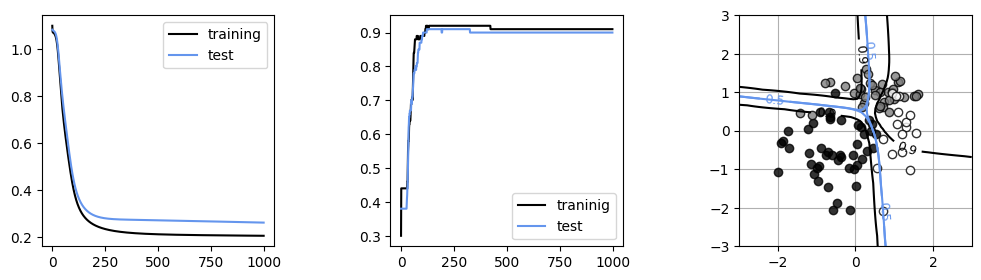

In [ ]:
# 리스트

plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# 학습 곡선 표시
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label= 'training')
plt.plot(history.history['val_loss'], 'cornflowerblue', label= 'test')
plt.legend()

# 정확도 표시
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label='traninig')
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label='test')
plt.legend()

# 경게선 표시
plt.subplot(1,3,3)
Show_data(X_test, T_test)
xn = 60
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0 , xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn * xn , 1)), np.reshape(xx1, (xn*xn , 1))]
y = model.predict(x)
K = 3
for ic in range(K):
  f = y[:, ic]
  f = f.reshape(xn, xn)
  f = f.T
  cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=['cornflowerblue', 'black'])
  cont.clabel(fmt='%1.1f', fontsize=9)
  plt.xlim(X_range0)
  plt.ylim(X_range1)
plt.show()

위의 처음 그림에서 훈련 데이터의 오차가 빠르게 증가하며 테스트 데이터의 오차도 증가하고 있지않기 때문에 오버피팅은 일어나지 않는다고 말할 수 있다.

또한 두번째 그림은 훈련 데이터와 테으트 데이터의 정답률을 보여준다.

마지막 그림은 학습한 모델이  카테고리 간 경계를 잘 나타내는것을 보인다.